# Minimización de una función matemática
### Usando scipy.optimize

https://docs.scipy.org/doc/scipy/reference/optimize.html
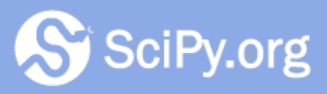

In [1]:
import numpy as np
import time
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

Primero, definamos una función matemática simple (lo opuesto al seno cardinal). Esta función tiene muchos mínimos locales pero un mínimo global único

$ f(x)=1-\frac{\sin(x)}{x}$


In [2]:
def f(x):
    return 1 - np.sin(x) / x

In [3]:
x = np.linspace(-20., 20., 1000)
y = f(x)

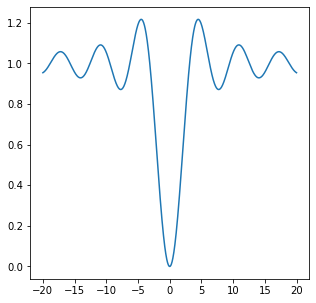

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)

El módulo scipy.optimize viene con muchas rutinas de minimización de funciones. La función minimize() ofrece una interfaz unificada para muchos algoritmos. El algoritmo Broyden-Fletcher-Goldfarb-Shanno (BFGS) (el algoritmo predeterminado en minimize()) da buenos resultados en general. La función minimize() requiere un punto inicial como argumento. Para funciones escalares univariadas, también podemos usar minimize_scalar().

In [5]:
x0 = 3 # try 10
start_time = time.time()
xmin = opt.minimize(f, x0).x
print("--- %s seconds ---" % (time.time() - start_time))
print(xmin)

--- 0.0021300315856933594 seconds ---
[-1.5538733e-08]


(-20, 20)

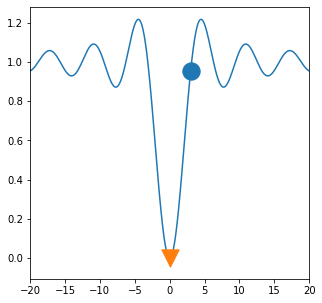

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

--- 0.05521440505981445 seconds ---
3.126388037344441e-12


(-20, 20)

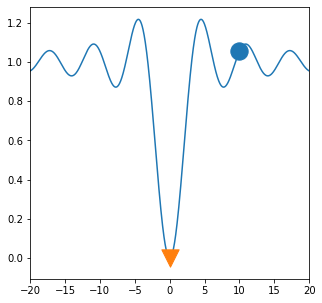

In [7]:
x0 = 10 #try 19
rranges = (slice(-20, 20, 0.01),)
start_time = time.time()
xmin = opt.brute(f,rranges)[0]
print("--- %s seconds ---" % (time.time() - start_time))
print(xmin)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

Encuentrar el mínimo global de una función utilizando el algoritmo Basin-hopping

Basin-hopping es un método de dos fases que combina un algoritmo global de pasos con minimización local en cada paso. Diseñado para imitar el proceso natural de minimización de energía de grupos de átomos.

Como los métodos de pasos, la aceptación de pasos y minimización son configurables, esta función también se puede usar para implementar otros métodos.

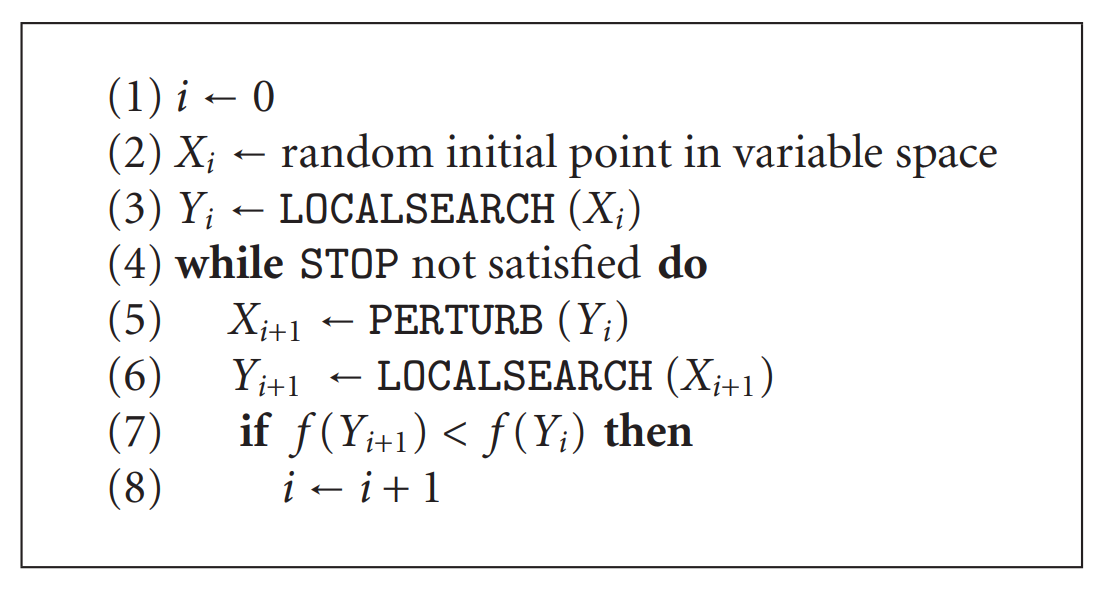

--- 0.6127710342407227 seconds ---
[5.62320189e-09]


(-20, 20)

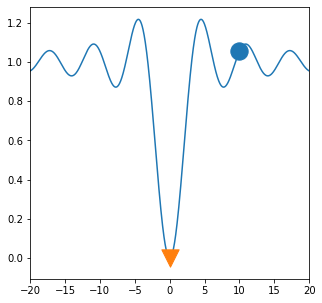

In [8]:
# We use 1000 iterations.
x0 = 10
start_time = time.time()
xmin = opt.basinhopping(f, x0, 1000).x
print("--- %s seconds ---" % (time.time() - start_time))
print(xmin)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

Ahora, definamos una nueva función, en dos dimensiones esta vez, llamada función Lévi:

$$ f(x,y) = \sin^{2}\left(3\pi x\right)+\left(x-1\right)^{2}\left(1+\sin^{2}\left(3\pi y\right)\right)+\left(y-1\right)^{2}\left(1+\sin^{2}\left(2\pi y\right)\right) $$

Esta función es muy irregular y puede ser difícil de minimizar en general. El mínimo global esperado es (1,1). La función Lévi es una de las muchas funciones de prueba para la optimización que los investigadores han desarrollado para estudiar y comparar algoritmos de optimización

In [9]:
def g(X):
    # X is a 2*N matrix, each column contains
    # x and y coordinates.
    x, y = X
    return (np.sin(3*np.pi*x)**2 +
            (x-1)**2 * (1 + np.sin(3*np.pi*y)**2) +
            (y-1)**2 * (1 + np.sin(2*np.pi*y)**2))

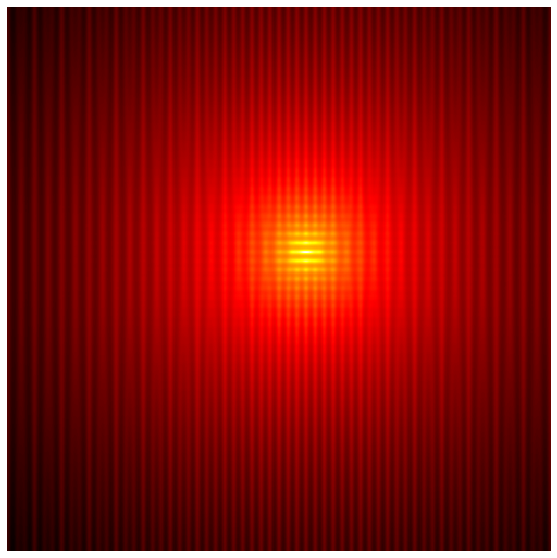

In [10]:
n = 500
k = 10
X, Y = np.mgrid[-k:k:n * 1j,
                -k:k:n * 1j]
Z = g(np.vstack((X.ravel(), Y.ravel()))).reshape(n, n)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# We use a logarithmic scale for the color here.
ax.imshow(np.log(Z), cmap=plt.cm.hot_r,
          extent=(-k, k, -k, k), origin=0)
ax.set_axis_off()

In [11]:
# We use the Powell method.
ini = (8, 3)
start_time = time.time()
x0, y0 = opt.minimize(g, (8, 3)
                      ,method='Powell').x
print("--- %s seconds ---" % (time.time() - start_time))
print(x0, y0)

--- 0.004187822341918945 seconds ---
1.0 1.0000000000000004


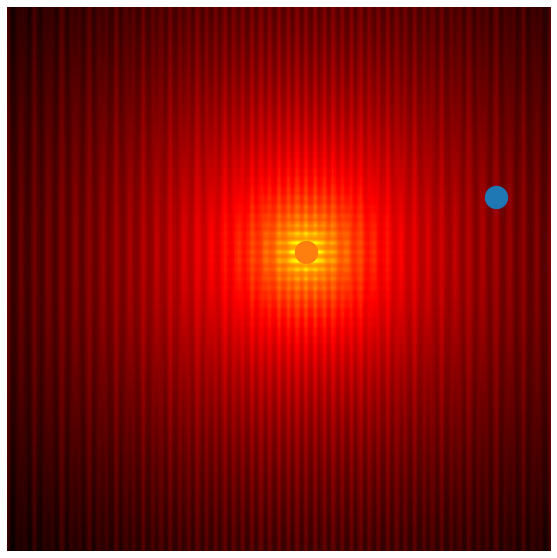

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(Z), cmap=plt.cm.hot_r,
          extent=(-k, k, -k, k), origin=0)
ax.scatter(ini[0],ini[1],s=500)
ax.scatter(x0, y0, s=500)
ax.set_axis_off()